<a href="https://colab.research.google.com/github/Calvin-CS344-21SP/ai-portfolio-epigeneticschick/blob/feedback/Copy_of_002_diagnose_basic_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# `002-diagnose-basic-classifier`

Task: plot a confusion matrix, find images that were misclassified

## Setup

In [ ]:
# setup fastai if needed
try: import fastbook
except ImportError: import subprocess; subprocess.run(['pip','install','-Uq','fastbook'])

# Import fastai code.
from fastai.vision.all import *

# Set a seed for reproducibility.
set_seed(12345, reproducible=True)

## Task

Starting with the classifier of notebook `000`:

1. Show one batch from each of the training and validation sets.
2. Plot the confusion matrix.
3. Find some images that were misclassified.

## Solution

In [ ]:
path = untar_data(URLs.PETS)/'images'

def is_cat(x): return x[0].isupper()
dls = ImageDataLoaders.from_name_func(
    path, get_image_files(path), valid_pct=0.2, seed=42,
    label_func=is_cat, item_tfms=Resize(224)
)
learn = cnn_learner(dls, resnet34, metrics=error_rate)
learn.fine_tune(1)
# Your code here
print("length of training set:" + str(len(dls.train_ds)) + "length of validation set:" + str(len(dls.valid_ds)))

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/hub/checkpoints/resnet34-333f7ec4.pth


epoch,train_loss,valid_loss,error_rate,time
0,0.166910,0.027056,0.007442,00:49


epoch,train_loss,valid_loss,error_rate,time
0,0.061378,0.018041,0.006089,00:53


length of training set:5912length of validation set:1478


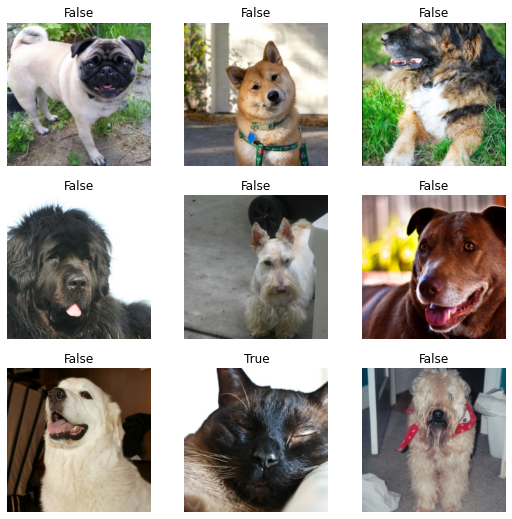

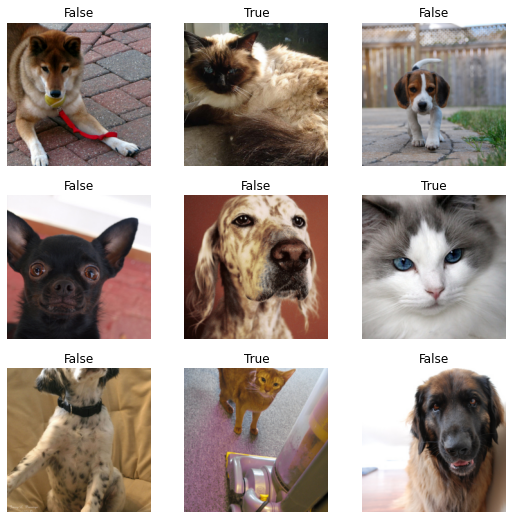

In [ ]:
dls.valid.show_batch()
dls.train.show_batch()

Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7f306bcb63b0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1203, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1177, in _shutdown_workers
    w.join(timeout=_utils.MP_STATUS_CHECK_INTERVAL)
  File "/usr/lib/python3.7/multiprocessing/process.py", line 138, in join
Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7f306bcb63b0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1203, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1177, in _shutdown_workers
    w.join(timeout=_utils.MP_STATUS_CHECK_INTERVAL)
  File "/usr/lib/python3.7/multiprocessing/process.py", line 138, in join
    assert s

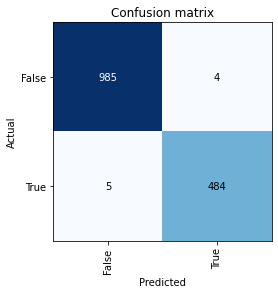

In [ ]:

interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()


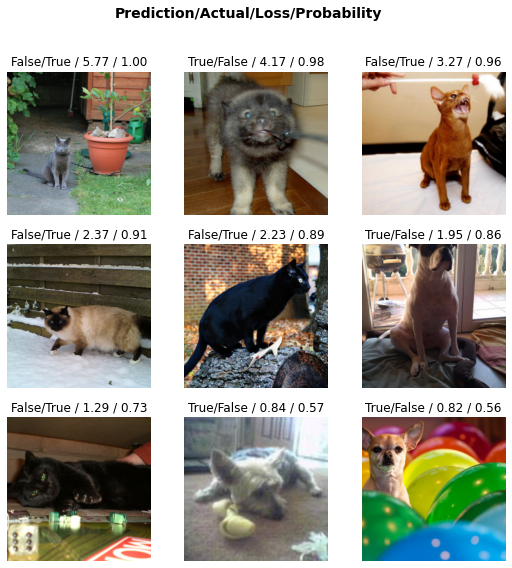

In [ ]:
interp.plot_top_losses(9)

## Analysis

**How many dogs were misclassified as cats? Vice versa?**
4 dogs were misclassified. 5 cats were misclassified. 

**Is the confusion matrix plotted on the training set or the validation set?**
The confusion matrix is plotted on the validation set

**Were there any mislabeled images in the training set? Which ones?**
There were both dogs and cats were mislabeled as the opposite of each other. 